# Desafio Final do Bootcamp de Arquiteto de Big Data

by Diego Nunes
https://github.com/odiego

* **Tabela para questões 1 a 10**
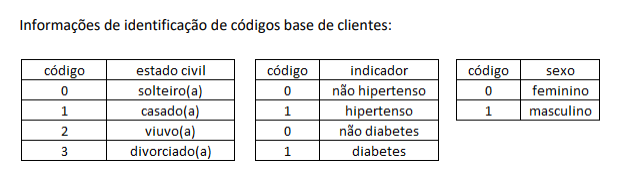

# Carregando as bibliotecas necessárias

In [1]:
# Atualizando lib xlrd para leitura do arquivo excel
!pip install xlrd==2.0.1
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 199 kB 49.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=e0de132f97d65e51c5e4e455a26992af92159c0dc8f86b98e3101d75f20ca10f
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
# Libs para web scrapping
!pip install lxml html5lib beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import os

In [4]:
from pyspark.sql import SparkSession #importa a biblioteca que cria a seção do spark

In [5]:
spark = SparkSession.builder.appName("desafio_IGTI").getOrCreate() #cria a seção caso não exista ou obtém a já criada

#Carregando os datasets

## Datasets Enunciado I

In [132]:
# lendo arquivo excel com dados de compras
import xlrd
df_compras = pd.read_excel('/content/compras.xls', sheet_name = 'compras')

In [131]:
# lendo json com dados de clientes
import json

# carregando usando Python JSON
with open('/content/clientes.json','r') as f:
    data = json.loads(f.read())
# ajustando os dados de lista (nested cliente)
df_clientes = pd.json_normalize(data, record_path = ['cliente'])

In [ ]:
# Dataset de produtos atraves de scrapping do site
url = 'https://profleandrolessa.wordpress.com/exercicio-de-coleta-de-dados/'
lista_produtos = pd.read_html(url, header=0, decimal=',', thousands='.')[0] #Usa primeira linha como cabeçalho

lista_produtos.info()
lista_produtos.head()
df_produtos = pd.DataFrame(lista_produtos)

df_produtos.head()

## Datasets Enunciado II

In [9]:
# Ratings
df_ratings = pd.read_csv('/content/ratings.csv', sep = ',', encoding='latin-1')

In [8]:
# Movies
df_movies = pd.read_csv('/content/movies.csv', sep = ',', encoding='latin-1')

#Info dos Datasets

In [ ]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         3000 non-null   int64  
 1   cod_produto         2990 non-null   float64
 2   qtd_produto         3000 non-null   int64  
 3   valor_unitario      2995 non-null   float64
 4   valor_total_compra  2979 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 117.3 KB


In [ ]:
df_compras

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97
1,2,1032.0,4,9.99,39.96
2,3,1049.0,2,5.99,NaN
3,4,1021.0,4,3.99,15.96
4,5,1001.0,4,22.00,88.00
...,...,...,...,...,...
2995,2996,1046.0,4,4.99,19.96
2996,2997,1021.0,1,3.99,3.99
2997,2998,1075.0,4,35.00,140.00
2998,2999,1002.0,3,1.99,5.97


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cod_cliente   3000 non-null   int64
 1   sexo          3000 non-null   int64
 2   idade         3000 non-null   int64
 3   qtd_filhos    3000 non-null   int64
 4   estado_civil  3000 non-null   int64
 5   cod_estado    3000 non-null   int64
 6   hipertenso    3000 non-null   int64
 7   diabetes      3000 non-null   int64
dtypes: int64(8)
memory usage: 187.6 KB


In [ ]:
df_clientes.describe()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,1500.500000,0.498000,46.548333,1.521000,1.49700,13.819000,0.498000,0.507667
std,866.169729,0.500079,16.616629,1.118321,1.09684,7.786085,0.500079,0.500025
min,1.000000,0.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,750.750000,0.000000,32.000000,1.000000,1.00000,7.000000,0.000000,0.000000
50%,1500.500000,0.000000,47.000000,2.000000,1.00000,14.000000,0.000000,1.000000
75%,2250.250000,1.000000,61.000000,3.000000,2.00000,20.000000,1.000000,1.000000
max,3000.000000,1.000000,75.000000,3.000000,3.00000,27.000000,1.000000,1.000000


In [ ]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_produto         87 non-null     int64  
 1   nome_produto        87 non-null     object 
 2   cod_classe_produto  87 non-null     int64  
 3   classe_produto      87 non-null     object 
 4   valor               87 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ KB


#Questões do Desafio - Enunciado I

## 1. Os dataset disponibilizados sem nenhum tratamento possui algum dado ausente?


Grupo de escolhas da pergunta:

**1- Sim. Possui valores ausentes no dataset de compras.**

2- Sim. Existe somente 21 registros de dados ausentes no dataset de compras e 10 registros no dataset de clientes.

3- Não. O dataset não possui dados ausentes.

4- Sim. Na tabela de clientes e estados.

In [ ]:
df_clientes.isna().sum()

cod_cliente     0
sexo            0
idade           0
qtd_filhos      0
estado_civil    0
cod_estado      0
hipertenso      0
diabetes        0
dtype: int64

In [ ]:
df_compras.isna().sum()

cod_cliente            0
cod_produto           10
qtd_produto            0
valor_unitario         5
valor_total_compra    21
dtype: int64

In [ ]:
# Corrigindo os valores nulos de TOTAL COMPRA
df_compras.valor_total_compra.fillna(value=(df_compras.qtd_produto * df_compras.valor_unitario), inplace=True)

In [ ]:
# Corrigindo os valores nulos de VALOR UNITARIO
df_compras.valor_unitario.fillna(value=(df_compras.valor_total_compra / df_compras.qtd_produto), inplace=True)

In [ ]:
# Corrigindo cod_produto           
#df_compras.loc[df_compras['cod_produto'].isnull()]
df_compras.dropna(subset=['cod_produto'], inplace=True) # para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [ ]:
df_compras.isna().sum()

cod_cliente           0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
dtype: int64

In [ ]:
df_compras

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011.0,3,5.99,17.97
1,2,1032.0,4,9.99,39.96
2,3,1049.0,2,5.99,11.98
3,4,1021.0,4,3.99,15.96
4,5,1001.0,4,22.00,88.00
...,...,...,...,...,...
2995,2996,1046.0,4,4.99,19.96
2996,2997,1021.0,1,3.99,3.99
2997,2998,1075.0,4,35.00,140.00
2998,2999,1002.0,3,1.99,5.97


## 2. Qual é o desvio padrão dos valores de produtos do dataset de produtos cuja classe do alimento é bebidas? Grupo de escolhas da pergunta:


1- 4.63

2- 2,50

**3- 1,63**

In [ ]:
# Exibindo o dataframe de produtos
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_produto         87 non-null     int64  
 1   nome_produto        87 non-null     object 
 2   cod_classe_produto  87 non-null     int64  
 3   classe_produto      87 non-null     object 
 4   valor               87 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ KB


In [ ]:
from pyspark.sql.functions import stddev
sparkDF=spark.createDataFrame(df_produtos) 

x = sparkDF.filter(sparkDF.classe_produto == 'Bebidas')
desvio = x.select(stddev('valor')).collect()
print(desvio)

[Row(stddev_samp(valor)=1.6394389284142301)]


## 3. Construa um histograma de distribuição das idades dos clientes do gênero masculino. Gera um gráfico com 20 barras. Qual é o CORRETO?

**Nenhuma das alternativas.**

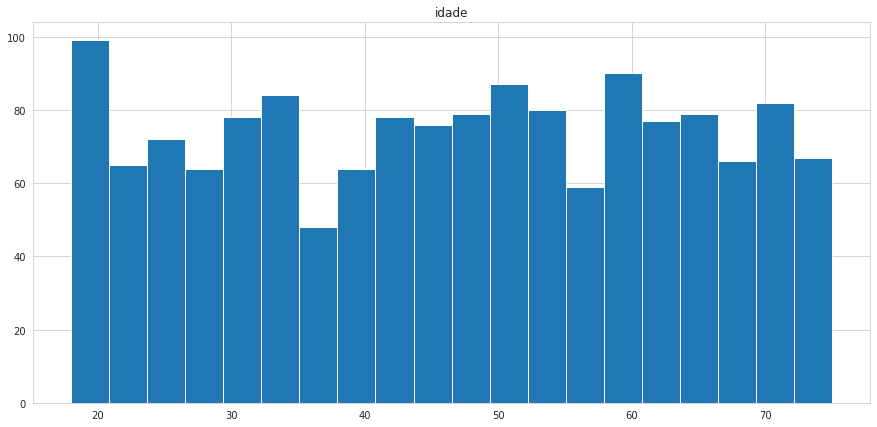

In [ ]:
import matplotlib.pyplot as plt
dfff = df_clientes.query("sexo == 1")
dfff.hist(column='idade', figsize=(15,7), bins=20)
plt.show()

## 4. Crie um novo dataframe a partir de compras_clientes com as colunas de idade e valor total da compra. Calcule o WCSS para esses dados e responda: Qual o valor de WCSS para o primeiro cluster?
1. 3594146

2. 1665877

3. 332278

4. 272074

In [ ]:
df_compras_e_clientes4 = pd.merge(df_clientes, df_compras, on = 'cod_cliente')
df_compras_e_clientes4.sort_values('cod_cliente') #classifica os valores segundo o Código do cliente

#df_tudo4 = pd.merge(df_compras_e_clientes4, df_produtos, on = 'cod_produto')

df_tudo4 = df_compras_e_clientes4
df_tudo4.isna().sum()

cod_cliente           0
sexo                  0
idade                 0
qtd_filhos            0
estado_civil          0
cod_estado            0
hipertenso            0
diabetes              0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
dtype: int64

In [ ]:
df_tudo4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 2989
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         2990 non-null   int64  
 1   sexo                2990 non-null   int64  
 2   idade               2990 non-null   int64  
 3   qtd_filhos          2990 non-null   int64  
 4   estado_civil        2990 non-null   int64  
 5   cod_estado          2990 non-null   int64  
 6   hipertenso          2990 non-null   int64  
 7   diabetes            2990 non-null   int64  
 8   cod_produto         2990 non-null   float64
 9   qtd_produto         2990 non-null   int64  
 10  valor_unitario      2990 non-null   float64
 11  valor_total_compra  2990 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 303.7 KB


In [ ]:
from sklearn.cluster import KMeans

def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,8): # Ciclo com 7 valores para determinar a melhor qtd
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
dados_cliente = df_tudo4[['idade', 'valor_total_compra']]
dados_cliente.head()

,idade,valor_total_compra
0,26,17.97
1,58,39.96
2,63,11.98
3,58,15.96
4,70,88.00


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)
wcss_clientes

[3594146.3889058544,
 1665877.0056578135,
 1077628.4135660413,
 724846.9305424874,
 533118.5850935788,
 442353.22539955506,
 378911.9084614109]

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 3594146.388905852
O cluster 1 possui valor de WCSS de: 1665877.0056578144
O cluster 2 possui valor de WCSS de: 1077618.0789159832
O cluster 3 possui valor de WCSS de: 727871.7875765114
O cluster 4 possui valor de WCSS de: 533118.5850935784
O cluster 5 possui valor de WCSS de: 442332.9266086738
O cluster 6 possui valor de WCSS de: 378913.65820714284


## 5. Qual a proporção de homens e mulheres hipertensos que compraram produtos da classe "Alimentação"?

1. 52,92 para os homens e 48,09 para as mulheres

2. 48,05 para os homens e 51,95 para as mulheres

3. 51.05 para os homens e 49,05 para as mulheres

4. **50.48 para os homens e 49.52 para as mulheres**

In [ ]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window

In [ ]:
# Reaproveitando o Dataset mergeado na questão 4 - e com os nulos removidos
df_teste = spark.createDataFrame(df_tudo4)

filtered = df_teste.filter("cod_classe_produto == 3").filter("hipertenso == 1").groupby(['cod_classe_produto', 'hipertenso', 'sexo']).count()

df = filtered.withColumn('percent', f.col('count')/f.sum('count').over(Window.partitionBy()))
df.orderBy('percent', ascending=False).show()
print('VALORES COM NULOS AJUSTADOS e REMOVIDOS')

+------------------+----------+----+-----+------------------+
|cod_classe_produto|hipertenso|sexo|count|           percent|
+------------------+----------+----+-----+------------------+
|                 3|         1|   1|  263|0.5047984644913628|
|                 3|         1|   0|  258|0.4952015355086372|
+------------------+----------+----+-----+------------------+

VALORES COM NULOS AJUSTADOS e REMOVIDOS


## 6. Gere o gráfico de análise de clusters com os centroides e selecione a opção que representa a imagem gerada.

**3ª opção**

In [ ]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line(x= range(1,8), y=wcss_clientes)
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template = 'plotly_dark')
fig.show()

In [ ]:
# Analisando o grafico com o metodo cotovelo, o nuemro de cluster nao cai pouco apartir de 4
kmeans_clientes = KMeans(n_clusters=4, random_state=0)

In [ ]:
df_tudo4['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
df_tudo4.sort_values('cod_cliente').head()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cluster
0,1,1,26,2,3,13,0,1,1011.0,3,5.99,17.97,2
1,2,1,58,0,2,2,0,0,1032.0,4,9.99,39.96,0
2,3,1,63,1,3,11,1,1,1049.0,2,5.99,11.98,0
3,4,1,58,2,2,11,1,1,1021.0,4,3.99,15.96,0
4,5,0,70,0,1,5,0,1,1001.0,4,22.00,88.00,3


In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 60.91697281,  12.88620132],
       [ 45.3       , 180.42616667],
       [ 32.07195846,  13.7052003 ],
       [ 46.61085973,  73.94230769]])

In [ ]:
grafico = px.scatter(x = df_tudo4['idade'], 
                     y = df_tudo4['valor_total_compra'], 
                     color = df_tudo4['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [6,6,6,6])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

## 7. Após aplicar o algoritmo de agrupamento, gere uma estatística com describe da variável valor total compra agrupando os resultados por cluster e assinale a alternativa CORRETA.


1. Nenhuma das alternativas.

2. **O cluster de indicador 2 possui desvio padrão menor que o cluster de indicador 1.**

3. A média do cluster de indicador 0 é 1227.06.

4. A média do valor total da compra do cluster de indicador 1 é maior que a soma de todas as médias de total de compras dos demais clusters.

In [ ]:
cluster_clientes = df_tudo4

In [ ]:
# Agrupando os resultados por cluster
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Indicador 0'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Indicador 1'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Indicador 2'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Indicador 3'

cluster_clientes.groupby('nome_cluster')['valor_total_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Indicador 0,1361.0,12.886201,9.184338,1.25,5.99,10.99,17.00,48.00
Indicador 1,60.0,180.426167,40.550644,129.98,140.00,170.97,194.97,259.96
Indicador 2,1348.0,13.705200,9.822997,1.25,5.99,11.96,17.98,48.00
Indicador 3,221.0,73.942308,23.436634,43.96,54.00,66.00,89.97,119.96


In [ ]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Indicador 0,1361.0,60.916973,8.133881,47.0,54.0,61.0,68.00,75.0
Indicador 1,60.0,45.300000,18.938169,18.0,29.5,41.5,65.25,75.0
Indicador 2,1348.0,32.071958,8.358611,18.0,25.0,32.0,39.00,47.0
Indicador 3,221.0,46.610860,16.103152,18.0,33.0,47.0,60.00,75.0


## 8. Assinale a alternativa que apresenta o resultado do diagrama de boxplot entre as variáveis quantidade de filhos e cluster.

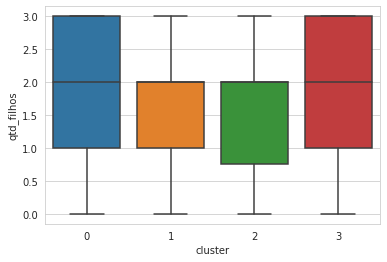

In [ ]:
import seaborn as sns # biblioteca para gráficos 

sns.set_style("whitegrid")  
sns.boxplot(x = 'cluster', y = 'qtd_filhos', data = cluster_clientes)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



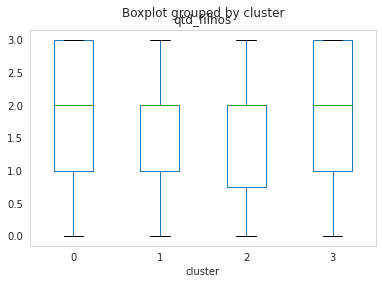

In [ ]:
cluster_clientes.boxplot(by ='cluster', column =['qtd_filhos'], grid = False)

In [ ]:
cluster_clientes

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,cluster,nome_cluster
0,1,1,26,2,3,13,0,1,1011.0,3,5.99,17.97,Lustra mÃ³veis,1,Produtos de Limpeza,5.99,0,Indicador 0
1,65,1,50,0,0,9,1,1,1011.0,3,5.99,17.97,Lustra mÃ³veis,1,Produtos de Limpeza,5.99,2,Indicador 2
2,126,0,35,2,0,16,1,1,1011.0,1,5.99,5.99,Lustra mÃ³veis,1,Produtos de Limpeza,5.99,0,Indicador 0
3,310,1,51,2,2,22,1,1,1011.0,3,5.99,17.97,Lustra mÃ³veis,1,Produtos de Limpeza,5.99,2,Indicador 2
4,313,0,38,0,2,24,0,1,1011.0,4,5.99,23.96,Lustra mÃ³veis,1,Produtos de Limpeza,5.99,0,Indicador 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2377,1,64,1,1,12,1,1,1015.0,3,12.00,36.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,2,Indicador 2
2986,2497,1,70,0,3,24,0,0,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,2,Indicador 2
2987,2709,0,69,3,0,9,1,0,1015.0,4,12.00,48.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,2,Indicador 2
2988,2785,1,30,1,0,19,1,0,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,0,Indicador 0


## 9. Qual é a quantidade de solteiros e hipertensos estão presentes no cluster de identificador 3? 

1. 27

2. 23

3. **29**

4. 21

In [ ]:
# solteiros = 0 / hipertensos = 1 
#cluster_clientes.query("nome_cluster == 'Indicador 3'").query("estado_civil == 0").query("hipertenso == 1")
cluster_clientes.query("nome_cluster == 'Indicador 3'").query("estado_civil == 0").query("hipertenso == 1").groupby(['cluster', 'hipertenso', 'estado_civil'])['cod_cliente'].count()

cluster  hipertenso  estado_civil
3        1           0               29
Name: cod_cliente, dtype: int64

## 10. Qual é o número total de diabéticos para o cluster de identificador 0?



1. 861

2. 100

3. 119

4. **681**

In [ ]:
cluster_clientes.query("nome_cluster == 'Indicador 0'").query("diabetes == 1")
#cluster_clientes.query("nome_cluster == 'Indicador 0'").query("diabetes == 1").groupby(['cluster', 'diabetes'])['cod_cliente'].count()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cod_produto,qtd_produto,valor_unitario,valor_total_compra,cluster,nome_cluster
2,3,1,63,1,3,11,1,1,1049.0,2,5.99,11.98,0,Indicador 0
3,4,1,58,2,2,11,1,1,1021.0,4,3.99,15.96,0,Indicador 0
7,8,0,65,0,2,4,1,1,1043.0,1,3.25,3.25,0,Indicador 0
27,28,1,56,2,0,23,1,1,1010.0,1,11.00,11.00,0,Indicador 0
29,30,1,61,1,2,6,1,1,1025.0,3,4.99,14.97,0,Indicador 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2989,1,69,1,0,1,0,1,1083.0,2,1.99,3.98,0,Indicador 0
2983,2994,1,61,1,1,4,1,1,1051.0,1,5.99,5.99,0,Indicador 0
2984,2995,0,68,0,3,10,0,1,1057.0,2,2.99,5.98,0,Indicador 0
2985,2996,1,63,1,2,12,0,1,1046.0,4,4.99,19.96,0,Indicador 0


# Questões do Desafio - Enunciado II

## 11. Quantos usuários distintos existem no dataset de ratings?

1. 326

2. **610**

3. 100836

4. 182

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
unique_list = df_ratings.userId.unique()
item_counts = df_ratings["userId"].value_counts()
print(item_counts)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64


## 12. Através algoritmo apriori gere os itens mais frequentes após a junção dos datasets. Utilize o parâmetro min_support=0.3 e responda: qual a é quantidade de itens frequentes foram criados?

1. 19 itens mais frequente

2. 15 itens mais frequente

3. 149 itens mais frequente

4. **39 itens mais frequente**

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=faebdc4e6fb4984b3a7761951d9216115c17d8bbc8cd3d08bd75d7e18366db0b
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [119]:
# Unindo os datasets
df_united = pd.merge(df_movies, df_ratings, on = 'movieId')

In [120]:
df_united.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [121]:
df_united.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [123]:
# Criando coluna 'visto' 
df_united.loc[df_united['rating'] > 0, 'visto'] = 1

In [124]:
df_united

,movieId,title,genres,userId,rating,timestamp,visto
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1.0
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,1.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,1.0
100833,193585,Flint (2017),Drama,184,3.5,1537109805,1.0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,1.0


In [126]:
# Criando a tabela pivot
df_pi = df_united.pivot_table(values = 'visto', index = 'userId', columns = 'title')

In [128]:
# Troca toddos NaN por 0
df_pi = df_pi.fillna(0)

In [129]:
df_pi.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]Â² (2009),[REC]Â³ 3 GÃ©nesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),Â¡Three Amigos! (1986),Ã nous la libertÃ© (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

frequent_itemsets = apriori(df_pi, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.300000,(Aladdin (1992))
1,0.334426,(American Beauty (1999))
2,0.329508,(Apollo 13 (1995))
3,0.309836,(Batman (1989))
4,0.388525,(Braveheart (1995))
5,0.357377,(Fight Club (1999))
6,0.539344,(Forrest Gump (1994))
7,0.311475,"(Fugitive, The (1993))"
8,0.314754,"(Godfather, The (1972))"
9,0.331148,(Independence Day (a.k.a. ID4) (1996))


## 13. Qual o ID do usuário que mais assistiu filmes?



1. **414**

2. 355

3. 599

4. 427

In [ ]:
unique_list = df_united.userId.unique()
item_counts = df_united["userId"].value_counts()
print(item_counts)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: userId, Length: 610, dtype: int64


## 14. Utilize o algoritmo association_rules, crie as regras de associação considerando, metric='confidence' e min_threshold=0.7 e responda: qual regra possui maior confiança?

1. Se (Forrest Gump) então (Shawshank Redemption)

2. Se (Jurassic Park) então (Forrest Gump)

3. Se (Star Wars: Episode IV) então (Star Wars: Episode V)

4. Se (Star Wars: Episode V) então (Star Wars: Episode IV)

In [117]:
#Criando as regras de associação
#Após a criação dos itens mais frequentes, o proximo passo é criar as regras de associação.
from mlxtend.frequent_patterns import association_rules

regras = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7) # 70% regras acontecerem
#visualizando as regras criadas
regras = regras[['antecedents','consequents', 'support','confidence','lift']]

regras = regras.rename(columns={"antecedents": "se", "consequents": "então", 
                       "support": "suporte", 
                       "confidence": "confiança", "lift": "LIFT"})

regras.sort_values(by = 'confiança', ascending = False)

,se,então,suporte,confiança,LIFT
12,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.311475,0.900474,2.188403
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.324590,0.831933,1.542489
0,(Braveheart (1995)),(Forrest Gump (1994)),0.300000,0.772152,1.431649
11,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.311475,0.756972,2.188403
2,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.377049,0.749186,1.389068
9,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.339344,0.741935,1.474204
6,(Star Wars: Episode IV - A New Hope (1977)),"(Matrix, The (1999))",0.300000,0.729084,1.599788
4,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.378689,0.728707,1.351097
8,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.363934,0.723127,1.391506
5,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.326230,0.713262,1.322461


## 15. Qual o suporte da regra:
Se (Pulp Fiction (1994)) então (Forrest Gump (1994))?

1. 0.32

2. 0.31

3. **0.37**

4. 0.36

In [118]:
regras.sort_values(by = 'suporte', ascending = False)

,se,então,suporte,confiança,LIFT
3,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.378689,0.702128,1.351097
4,"(Shawshank Redemption, The (1994))",(Forrest Gump (1994)),0.378689,0.728707,1.351097
2,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.377049,0.749186,1.389068
7,"(Shawshank Redemption, The (1994))",(Pulp Fiction (1994)),0.363934,0.700315,1.391506
8,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.363934,0.723127,1.391506
9,"(Silence of the Lambs, The (1991))",(Pulp Fiction (1994)),0.339344,0.741935,1.474204
5,"(Silence of the Lambs, The (1991))",(Forrest Gump (1994)),0.326230,0.713262,1.322461
10,"(Silence of the Lambs, The (1991))","(Shawshank Redemption, The (1994))",0.326230,0.713262,1.372522
1,(Jurassic Park (1993)),(Forrest Gump (1994)),0.324590,0.831933,1.542489
11,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.311475,0.756972,2.188403
